<a href="https://colab.research.google.com/github/outlaw-xd/stock_index/blob/main/usa_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
def analyze_and_forecast(file_path, index_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    from prophet import Prophet
    from datetime import datetime

    # 🔹 Load and clean data
    df = pd.read_csv(file_path)
    df.rename(columns={'Date': 'ds', 'Close/Last': 'y'}, inplace=True)
    df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
    df['y'] = df['y'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df = df.dropna(subset=['ds', 'y']).drop_duplicates(subset='ds').sort_values('ds')

    # 🔧 Shift data to end at today
    latest_ds = df['ds'].max()
    today = pd.Timestamp.today().normalize()
    shift_days = (today - latest_ds).days
    df['ds'] = df['ds'] + pd.Timedelta(days=shift_days)

    # 📊 Summary
    current_price = df['y'].iloc[-1]
    max_price = df['y'].max()
    min_price = df['y'].min()
    trend = "🔼 Upward" if df['y'].iloc[-1] > df['y'].iloc[-7] else "🔽 Downward"

    print(f"\n📊 {index_name} Overview")
    print(f"Current Price     : {current_price:.2f}")
    print(f"Max Price         : {max_price:.2f}")
    print(f"Min Price         : {min_price:.2f}")
    print(f"7-Day Trend       : {trend}")
    print("-" * 50)

    # 🔮 Forecast with Prophet
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    forecast = model.predict(model.make_future_dataframe(periods=1825))

    # 🔁 Forecast periods
    periods = {
        '1 Year (365 days)': 365,
        '2 Years (730 days)': 730,
        '5 Years (1825 days)': 1825
    }

    for label, days in periods.items():
        # ⏳ Filter from today onward
        future_range = forecast[['ds', 'yhat']][forecast['ds'] >= today].head(days).copy()
        future_range['yhat_smooth'] = future_range['yhat'].rolling(window=7, min_periods=1).mean()

        print(f"\n🔮 {index_name} Forecast - {label}")
        display(future_range[['ds', 'yhat']].head())

        # 📈 Plot
        plt.figure(figsize=(12, 5))
        plt.plot(df['ds'], df['y'], label='Historical Data', color='black')
        plt.plot(future_range['ds'], future_range['yhat_smooth'], label=f'{label} Forecast', linewidth=2)
        plt.title(f"{index_name} Forecast - {label}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/vzgptn1x.json



📊 S&P 500 Overview
Current Price     : 5980.87
Max Price         : 6144.15
Min Price         : 3009.05
7-Day Trend       : 🔽 Downward
--------------------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/6xe61ow5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96641', 'data', 'file=/tmp/tmprluoxvoi/vzgptn1x.json', 'init=/tmp/tmprluoxvoi/6xe61ow5.json', 'output', 'file=/tmp/tmprluoxvoi/prophet_model5s741nkv/prophet_model-20250620200149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:01:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:01:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 S&P 500 Forecast - 1 Year (365 days)


,ds,yhat
1254,2025-06-20,5815.580761
1255,2025-06-21,5811.479731
1256,2025-06-22,5811.544224
1257,2025-06-23,5793.980135
1258,2025-06-24,5793.080189


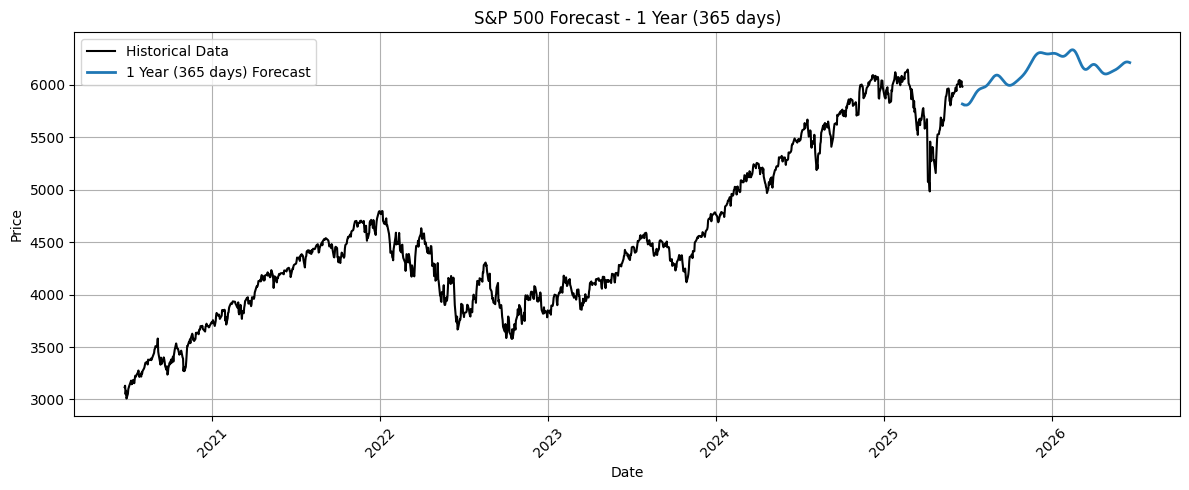


🔮 S&P 500 Forecast - 2 Years (730 days)


,ds,yhat
1254,2025-06-20,5815.580761
1255,2025-06-21,5811.479731
1256,2025-06-22,5811.544224
1257,2025-06-23,5793.980135
1258,2025-06-24,5793.080189


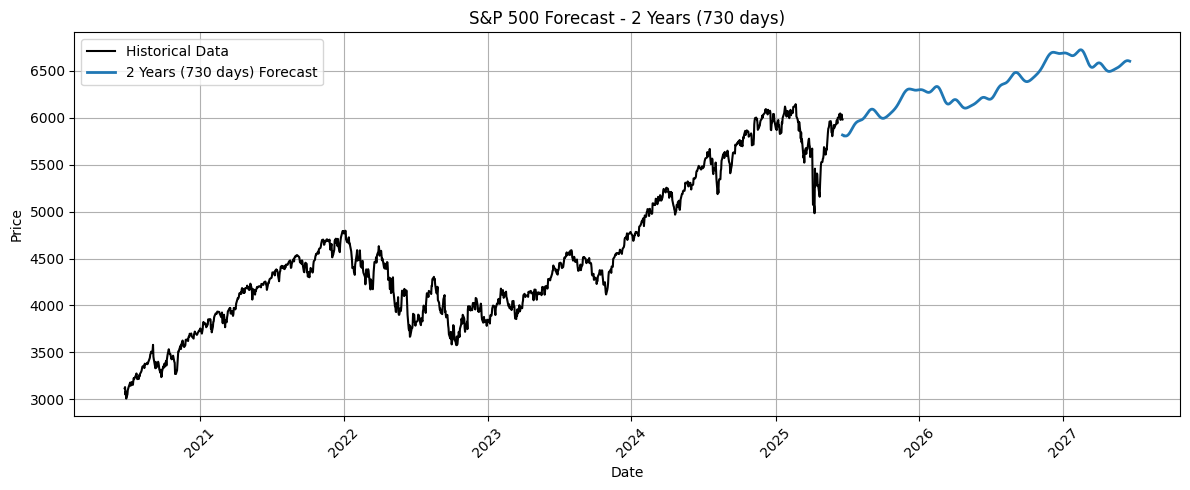


🔮 S&P 500 Forecast - 5 Years (1825 days)


,ds,yhat
1254,2025-06-20,5815.580761
1255,2025-06-21,5811.479731
1256,2025-06-22,5811.544224
1257,2025-06-23,5793.980135
1258,2025-06-24,5793.080189


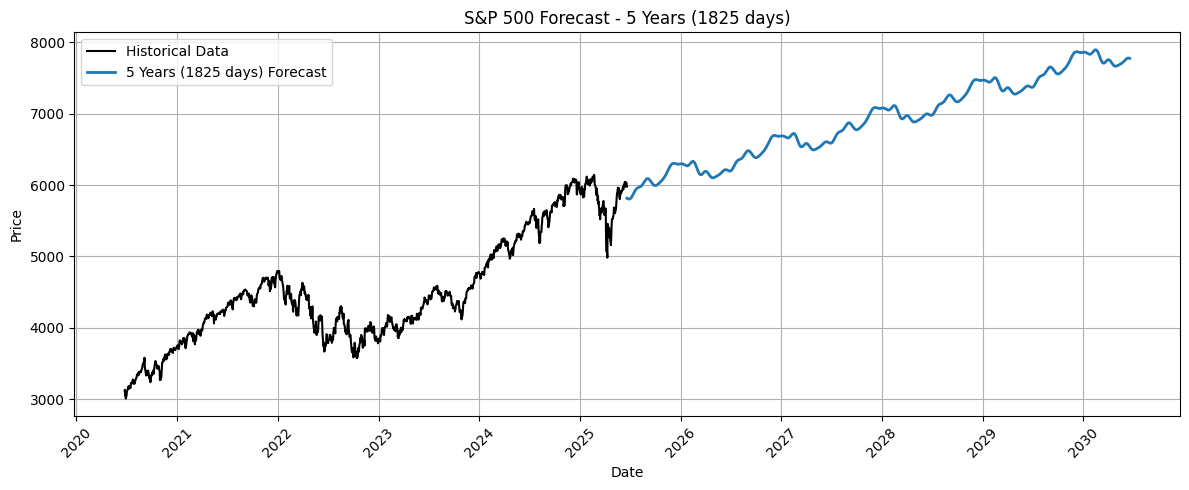

DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/nbtr0f6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/35a0vzje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57249', 'data', 'file=/tmp/tmprluoxvoi/nbtr0f6b.json', 'init=/tmp/tmprluoxvoi/35a0vzje.json', 'output', 'file=/tmp/tmprluoxvoi/prophet_model0w2n0_e_/prophet_model-20250620200152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:01:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



📊 Dow Jones Overview
Current Price     : 42171.66
Max Price         : 45014.04
Min Price         : 25015.55
7-Day Trend       : 🔽 Downward
--------------------------------------------------


20:01:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 Dow Jones Forecast - 1 Year (365 days)


,ds,yhat
1254,2025-06-20,41781.820243
1255,2025-06-21,41746.127716
1256,2025-06-22,41740.219659
1257,2025-06-23,41589.347313
1258,2025-06-24,41581.378025


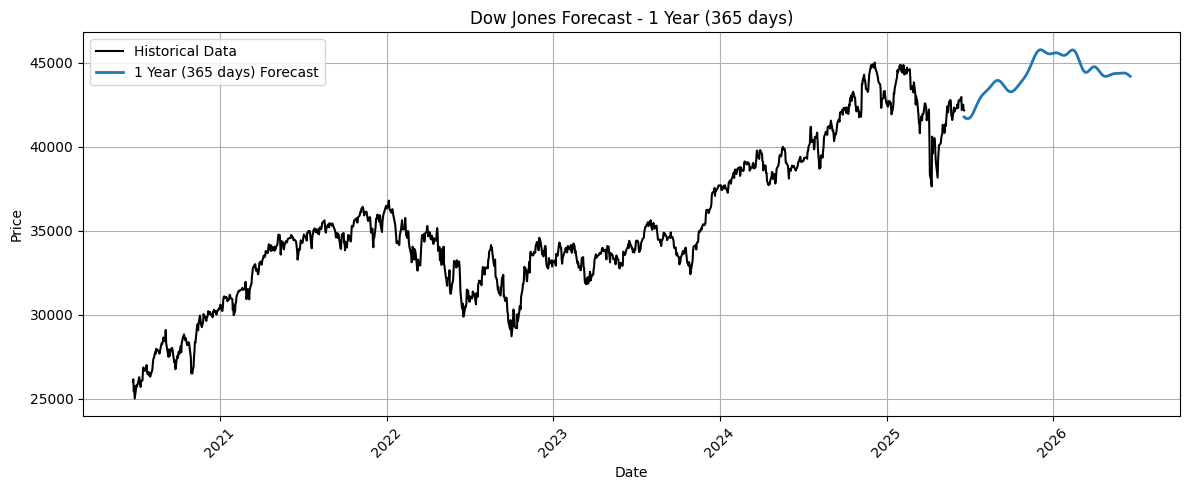


🔮 Dow Jones Forecast - 2 Years (730 days)


,ds,yhat
1254,2025-06-20,41781.820243
1255,2025-06-21,41746.127716
1256,2025-06-22,41740.219659
1257,2025-06-23,41589.347313
1258,2025-06-24,41581.378025


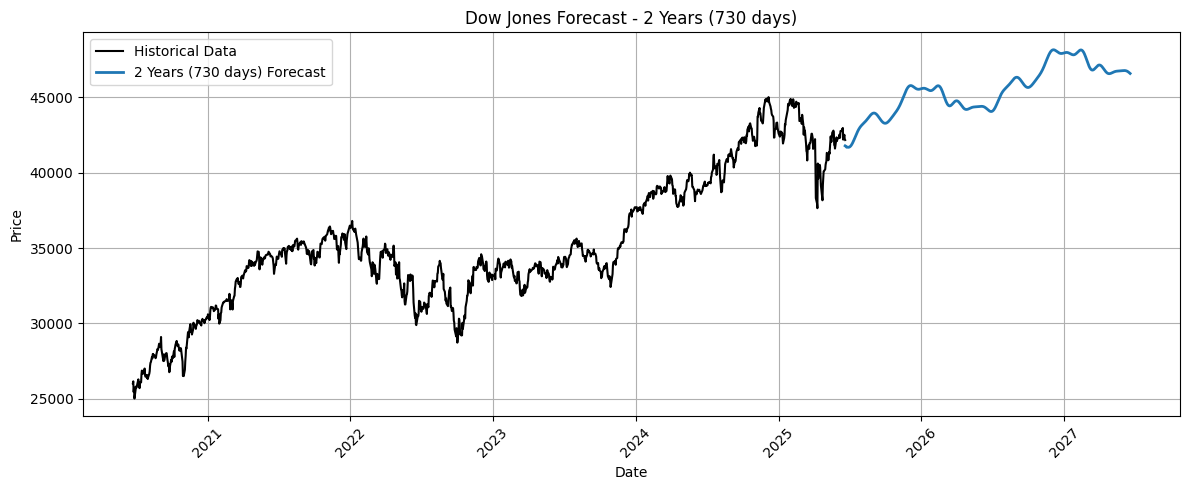


🔮 Dow Jones Forecast - 5 Years (1825 days)


,ds,yhat
1254,2025-06-20,41781.820243
1255,2025-06-21,41746.127716
1256,2025-06-22,41740.219659
1257,2025-06-23,41589.347313
1258,2025-06-24,41581.378025


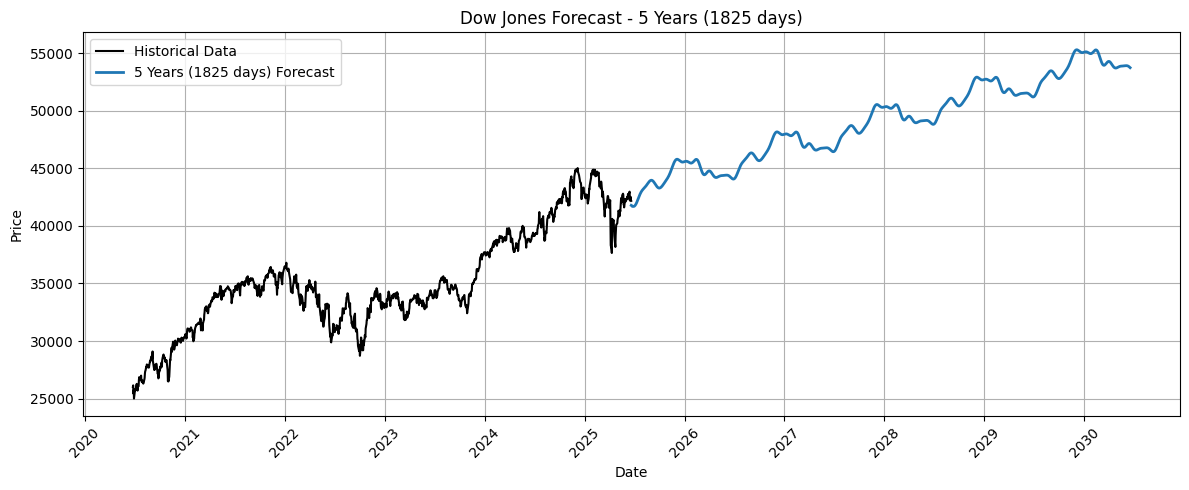

DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/se3w9ght.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/sif9_tu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26263', 'data', 'file=/tmp/tmprluoxvoi/se3w9ght.json', 'init=/tmp/tmprluoxvoi/sif9_tu_.json', 'output', 'file=/tmp/tmprluoxvoi/prophet_modelelo4rica/prophet_model-20250620200154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



📊 NASDAQ Overview
Current Price     : 21719.69
Max Price         : 22175.60
Min Price         : 9849.36
7-Day Trend       : 🔽 Downward
--------------------------------------------------


20:01:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 NASDAQ Forecast - 1 Year (365 days)


,ds,yhat
1254,2025-06-20,21063.333002
1255,2025-06-21,21055.299745
1256,2025-06-22,21059.035186
1257,2025-06-23,21025.616666
1258,2025-06-24,21028.033223


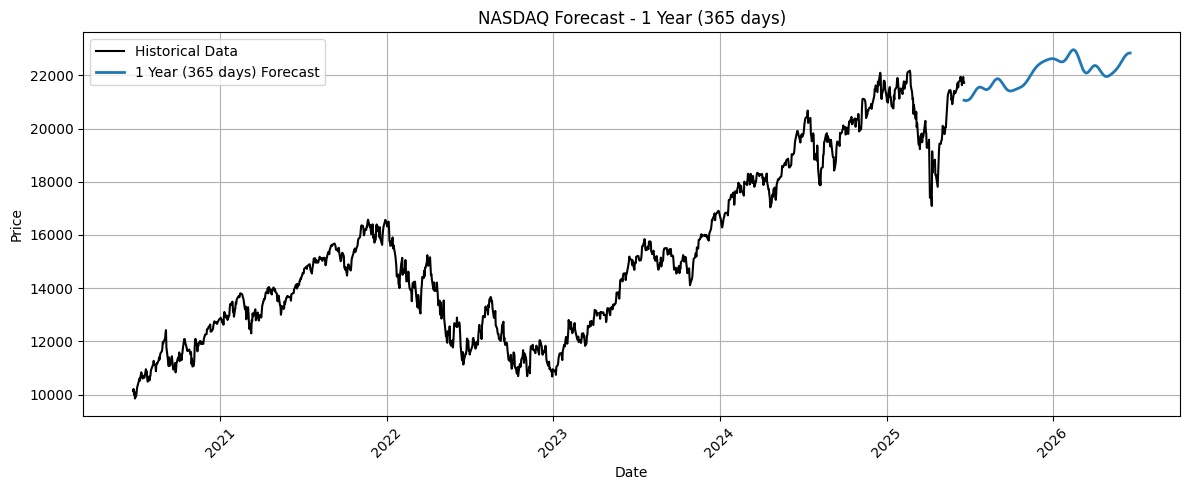


🔮 NASDAQ Forecast - 2 Years (730 days)


,ds,yhat
1254,2025-06-20,21063.333002
1255,2025-06-21,21055.299745
1256,2025-06-22,21059.035186
1257,2025-06-23,21025.616666
1258,2025-06-24,21028.033223


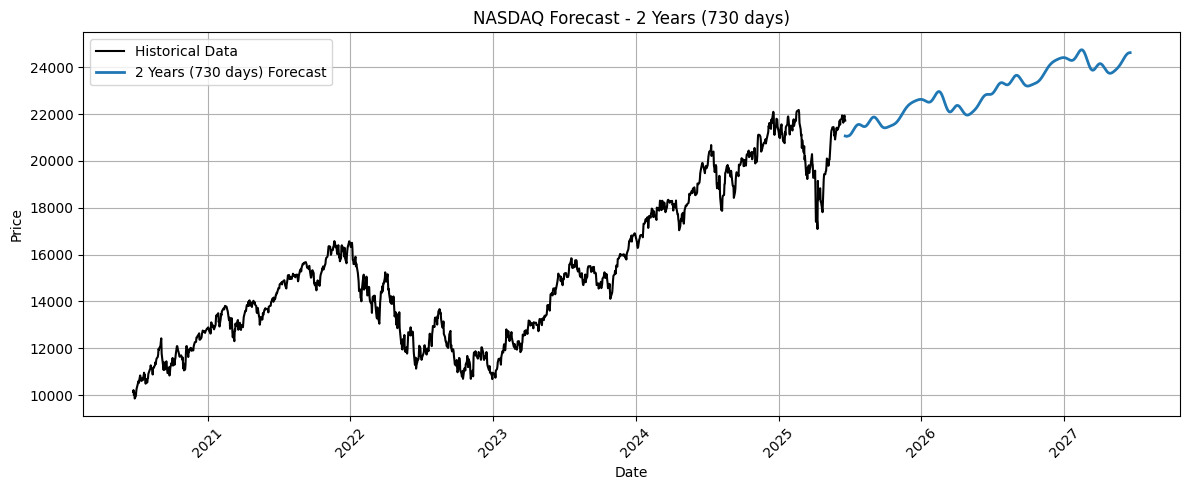


🔮 NASDAQ Forecast - 5 Years (1825 days)


,ds,yhat
1254,2025-06-20,21063.333002
1255,2025-06-21,21055.299745
1256,2025-06-22,21059.035186
1257,2025-06-23,21025.616666
1258,2025-06-24,21028.033223


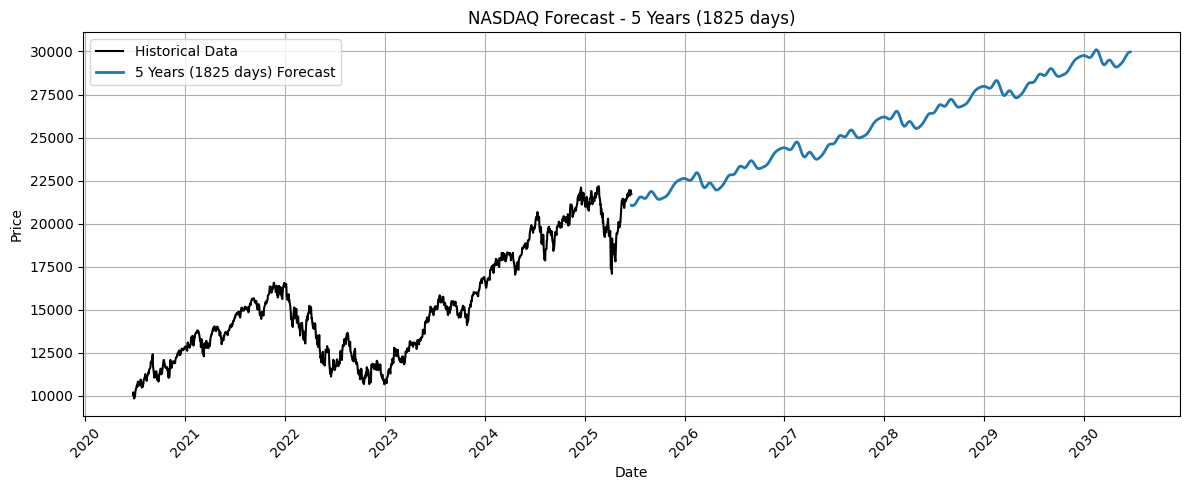

DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/sm8b0pdf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprluoxvoi/ozo979mv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22483', 'data', 'file=/tmp/tmprluoxvoi/sm8b0pdf.json', 'init=/tmp/tmprluoxvoi/ozo979mv.json', 'output', 'file=/tmp/tmprluoxvoi/prophet_model2r8nt_ac/prophet_model-20250620200157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:01:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



📊 Russell 2000 Overview
Current Price     : 2112.96
Max Price         : 2442.74
Min Price         : 1378.78
7-Day Trend       : 🔽 Downward
--------------------------------------------------


20:01:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 Russell 2000 Forecast - 1 Year (365 days)


,ds,yhat
1254,2025-06-20,2061.889478
1255,2025-06-21,2058.064537
1256,2025-06-22,2055.788633
1257,2025-06-23,2051.374683
1258,2025-06-24,2048.863950


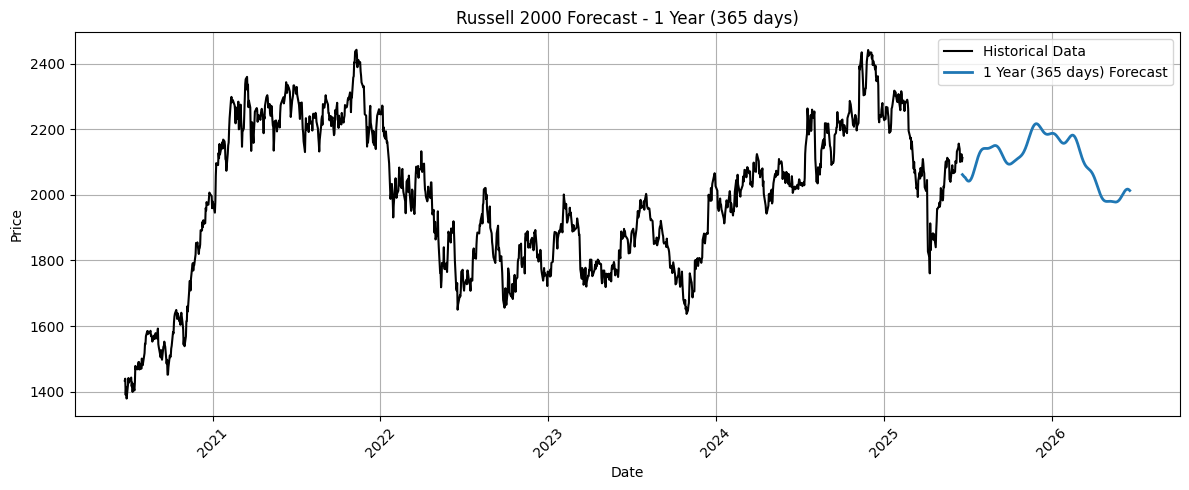


🔮 Russell 2000 Forecast - 2 Years (730 days)


,ds,yhat
1254,2025-06-20,2061.889478
1255,2025-06-21,2058.064537
1256,2025-06-22,2055.788633
1257,2025-06-23,2051.374683
1258,2025-06-24,2048.863950


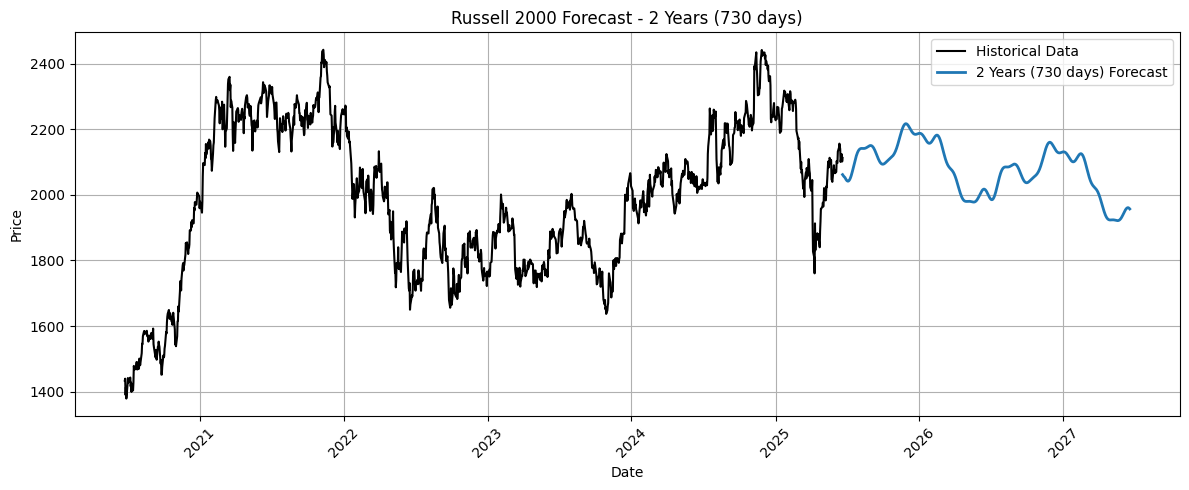


🔮 Russell 2000 Forecast - 5 Years (1825 days)


,ds,yhat
1254,2025-06-20,2061.889478
1255,2025-06-21,2058.064537
1256,2025-06-22,2055.788633
1257,2025-06-23,2051.374683
1258,2025-06-24,2048.863950


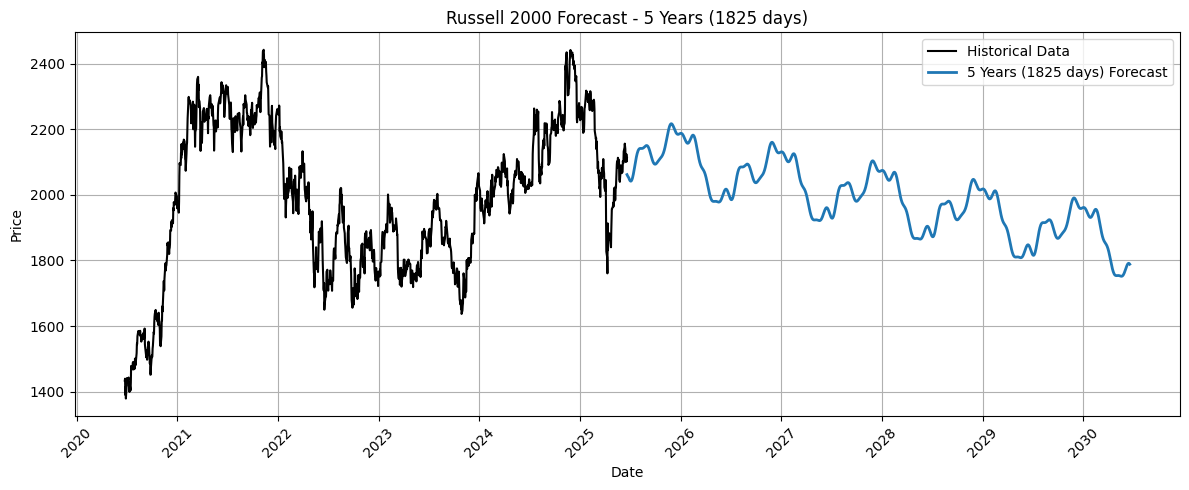

In [31]:
base_path = '/content/drive/MyDrive/StockData'

analyze_and_forecast(f'{base_path}/SnP.csv', 'S&P 500')
analyze_and_forecast(f'{base_path}/downjones.csv', 'Dow Jones')
analyze_and_forecast(f'{base_path}/nasdaq.csv', 'NASDAQ')
analyze_and_forecast(f'{base_path}/rut.csv', 'Russell 2000')


NameError: name 'forecast_summary' is not defined